## Linear visualization

In [48]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

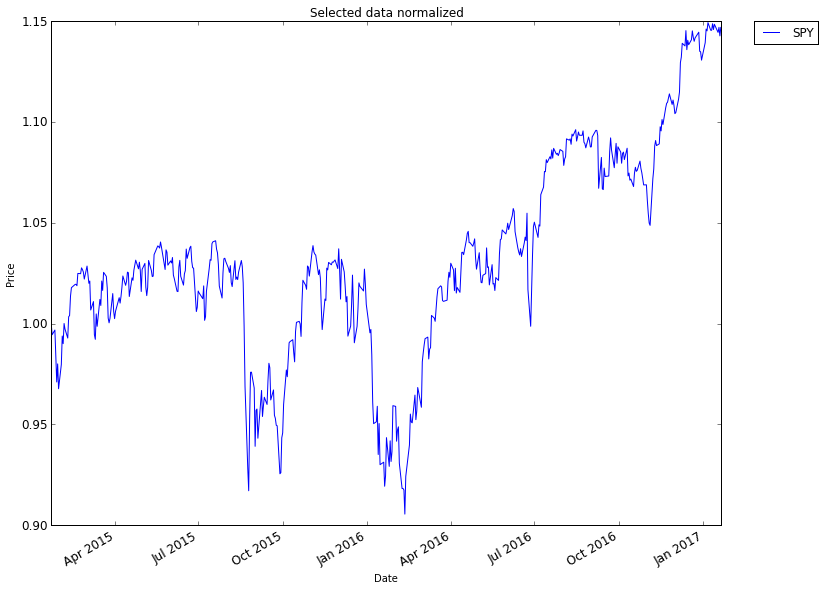

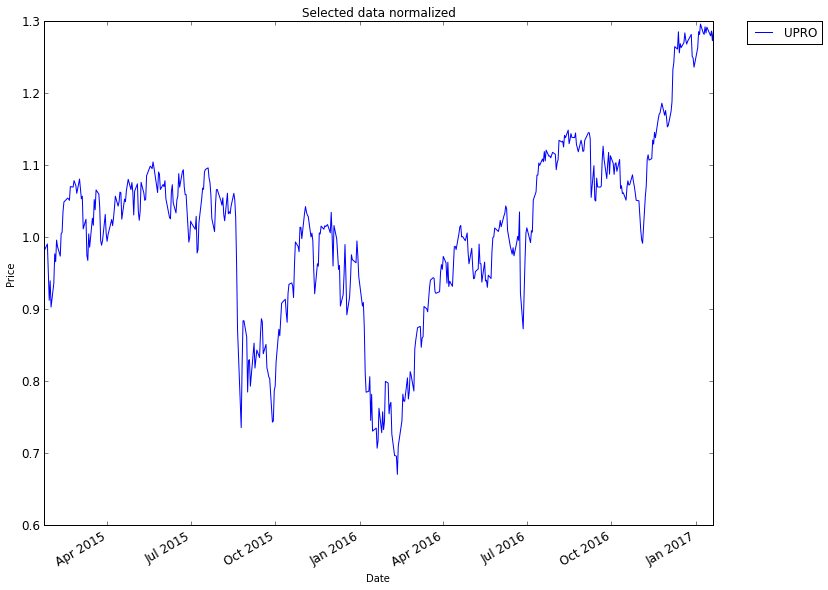

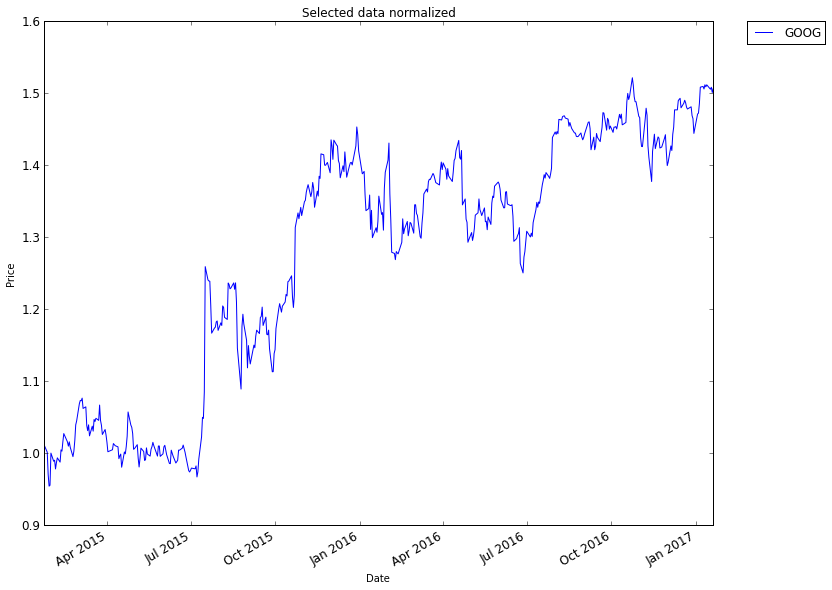

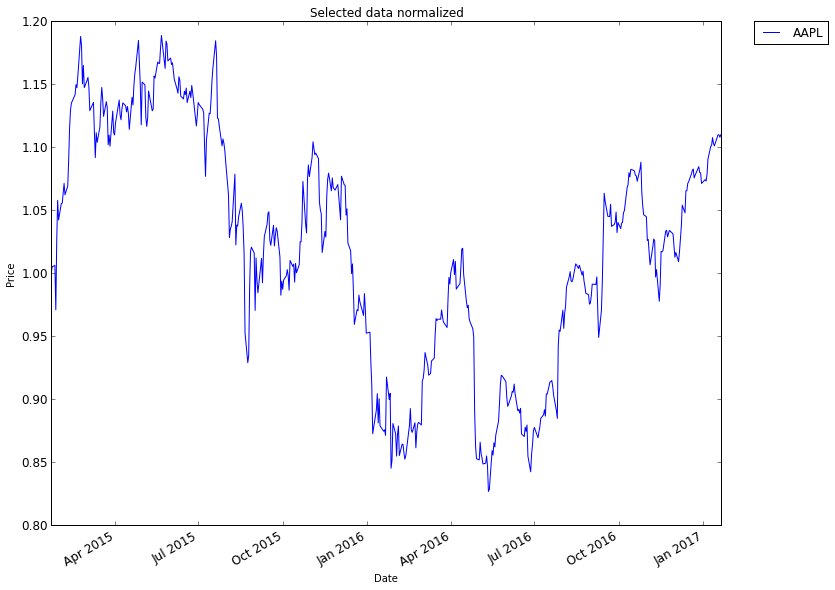

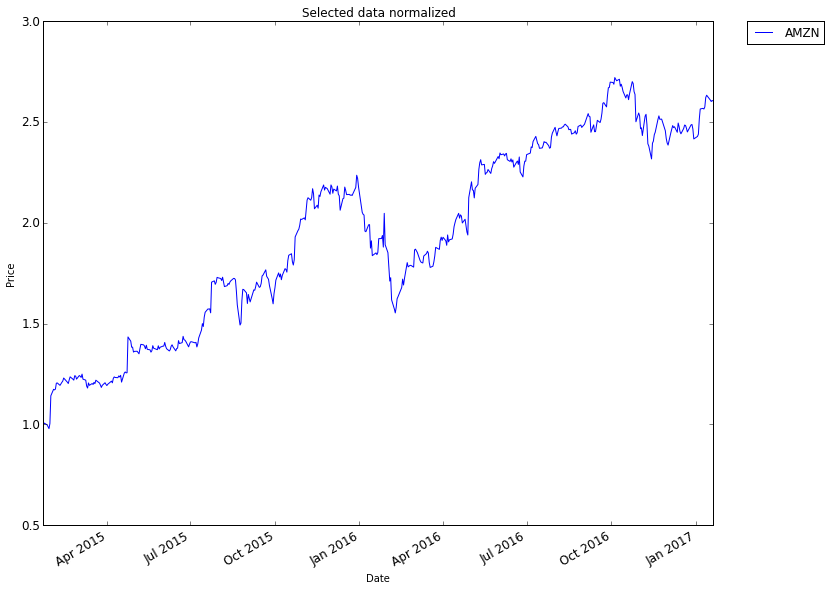

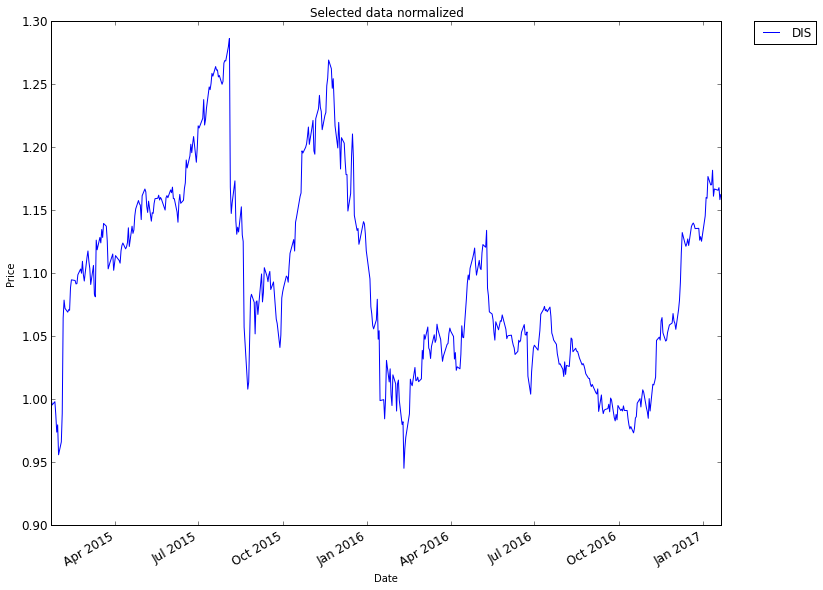

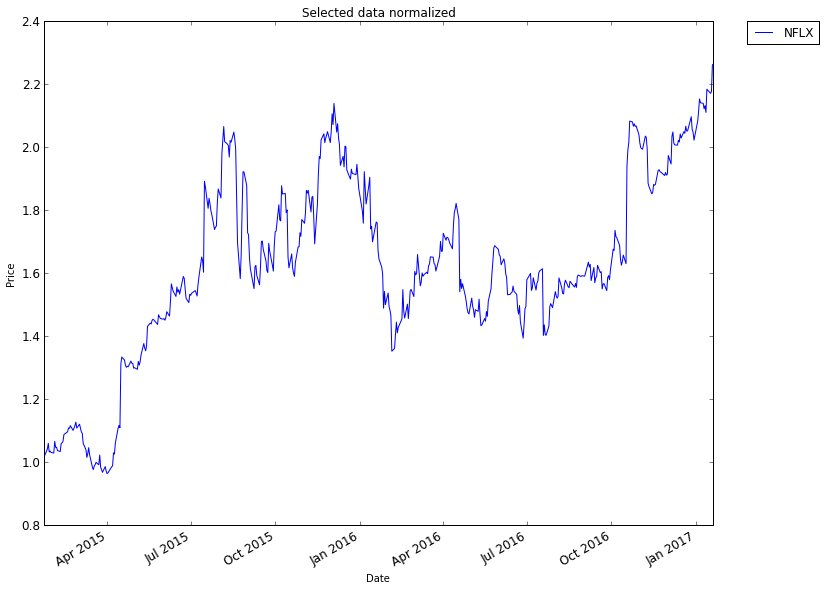

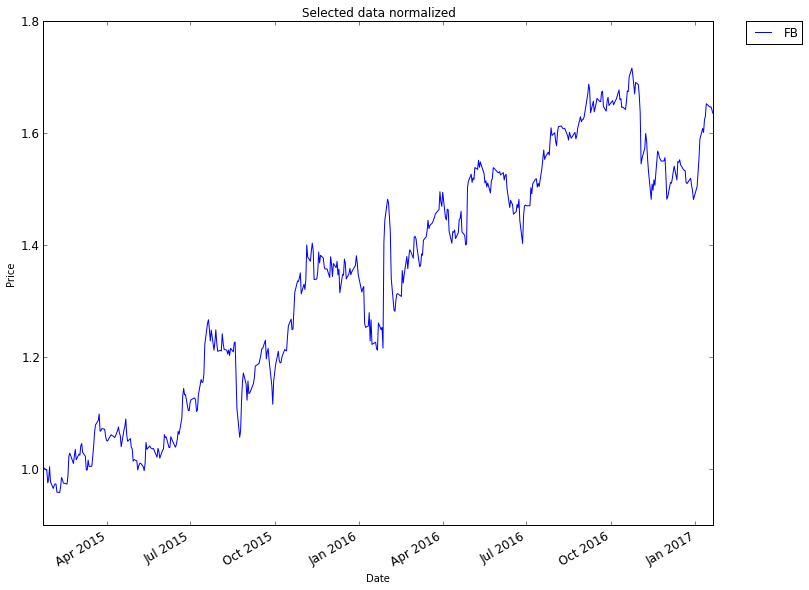

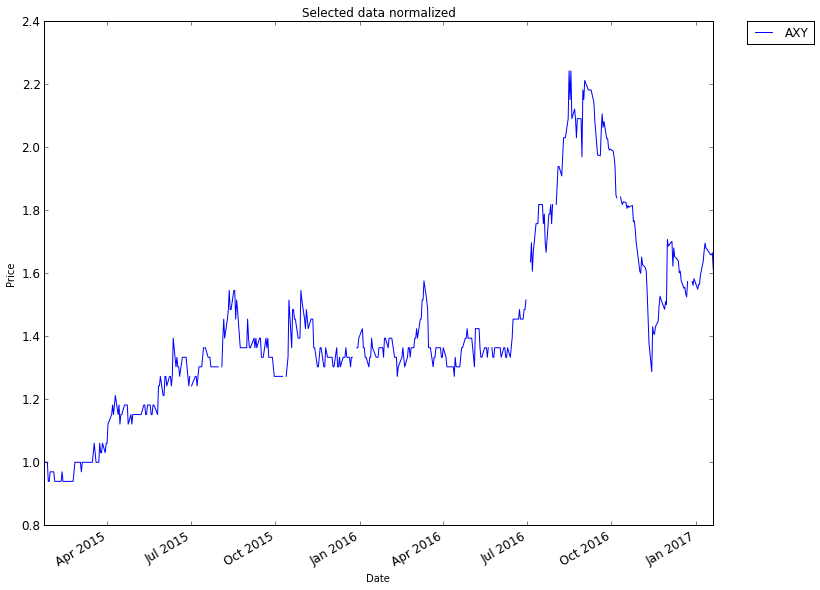

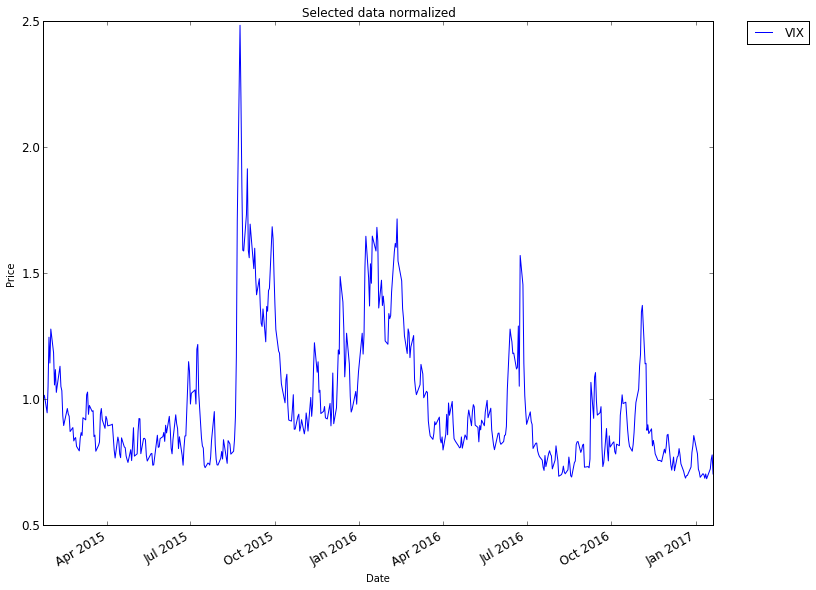

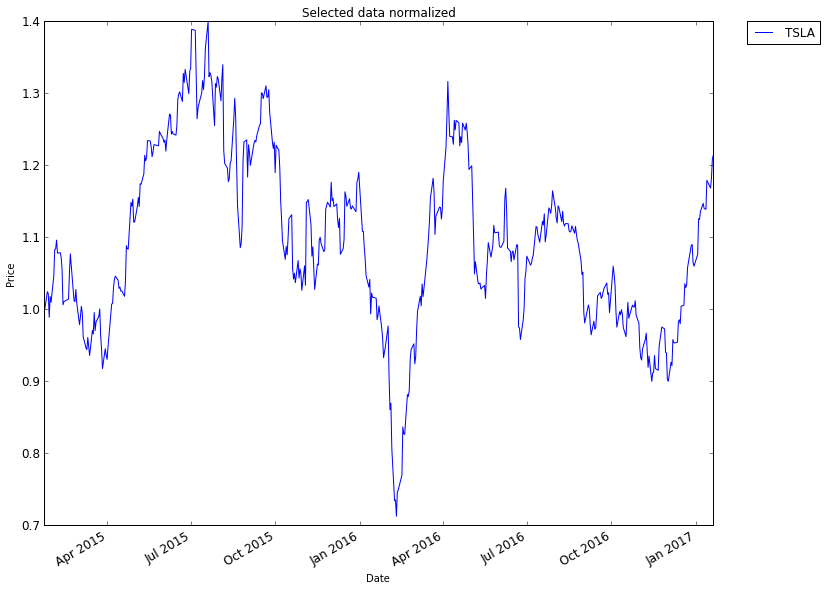

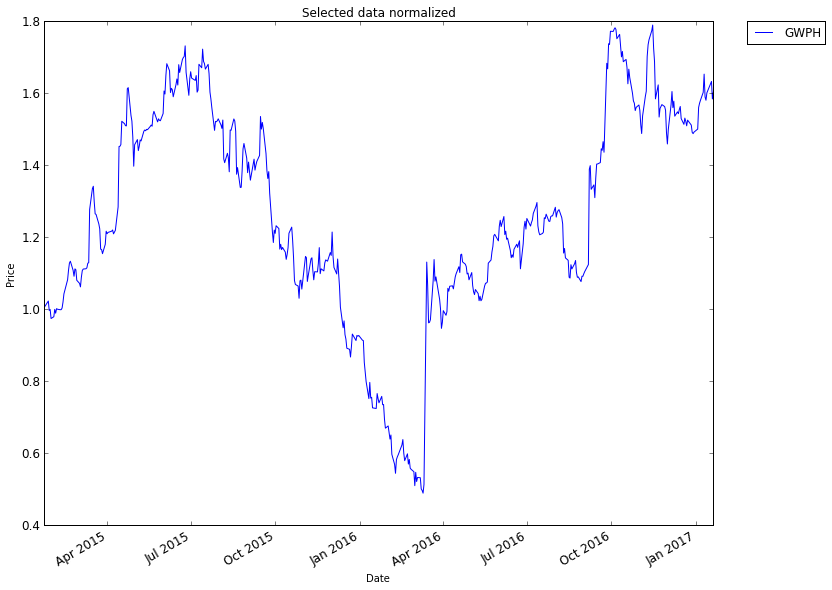

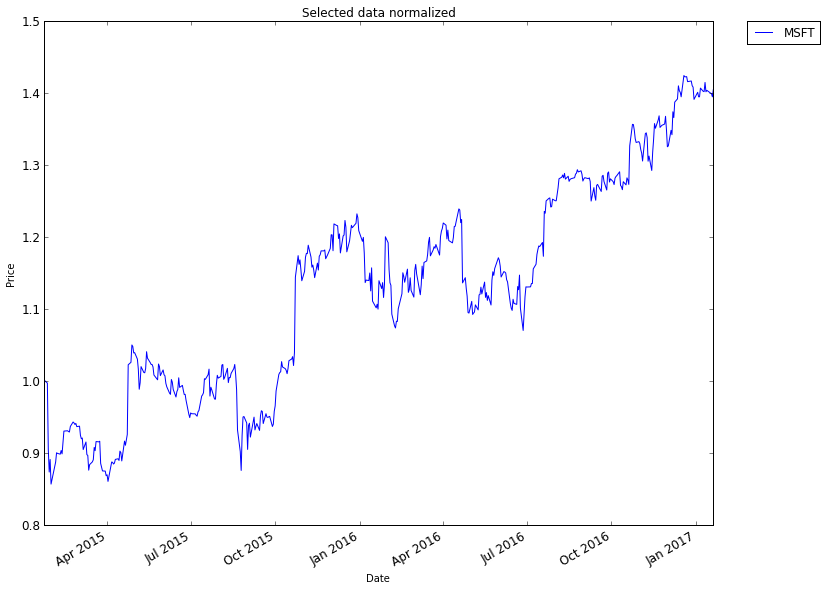

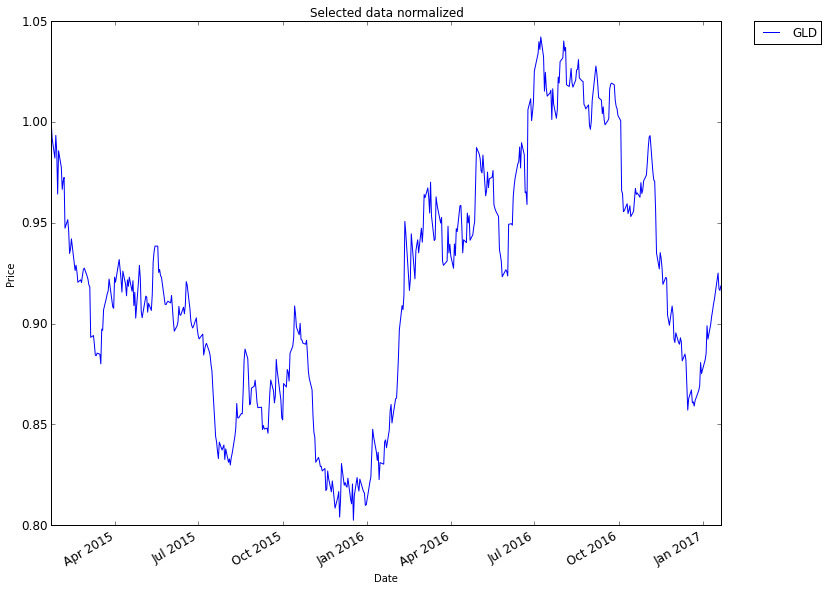

In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LinearRegression

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
    return df

def plot_data(df, title="Stock prices"):
    ax = df.plot(title=title, fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    
    
def plot_selected(df, columns, start_index, end_index):   
    # Normalize stock prices
    df = df/ df.ix[0,:]
    plot_data(df.ix[start_index:end_index,columns], title="Selected data normalized")

def test_run():
    # Define a date range
    dates = pd.date_range('2015-01-22', '2017-01-22')
    start = '2015-01-22'
    end = '2017-01-22'
    
    # Create linear regression object
    regr = LinearRegression()
    
    # Choose stock symbols to read.  SPY will be added in get_data()
    symbols = ['UPRO','GOOG','AAPL','AMZN','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    
    # plot_selected_normalize(df, ['SPY','UPRO'], '2014-09-26', '2016-12-18')
    plot_selected(df, ['SPY'], start, end)
    plot_selected(df, ['UPRO'], start, end)
    plot_selected(df, ['GOOG'], start, end)
    plot_selected(df, ['AAPL'], start, end)
    plot_selected(df, ['AMZN'], start, end)
    plot_selected(df, ['DIS'], start, end)
    plot_selected(df, ['NFLX'], start, end)
    plot_selected(df, ['FB'], start, end)
    plot_selected(df, ['AXY'], start, end)
    plot_selected(df, ['VIX'], start, end)
    plot_selected(df, ['TSLA'], start, end)
    plot_selected(df, ['GWPH'], start, end)
    plot_selected(df, ['MSFT'], start, end)
    plot_selected(df, ['GLD'], start, end)
    
if __name__ == "__main__":
    test_run()